In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [4]:
heart_df = pd.read_csv(r"C:\Users\MALCOM_TREVOR\Desktop\DATA SCIENCE\dataset\heart_data.csv",usecols = ['height','weight','cholesterol','gluc','cardio'])

In [5]:
heart_df.shape

(70000, 5)

In [6]:
heart_df.head()

,height,weight,cholesterol,gluc,cardio
0,168,62.0,1,1,0
1,156,85.0,3,1,1
2,165,64.0,3,1,1
3,169,82.0,1,1,1
4,156,56.0,1,1,0


In [7]:
heart_df.shape

(70000, 5)

In [8]:
#heart_df = heart_df.iloc[0:30]

In [9]:
heart_df.shape

(70000, 5)

## creating a scatter plot

In [10]:
height = heart_df['height']
weight = heart_df['weight']
chole = heart_df['cholesterol']
glu = heart_df['gluc']
cardio = heart_df['cardio']

In [11]:
heart_df.corr()

,height,weight,cholesterol,gluc,cardio
height,1.000000,0.290968,-0.050226,-0.018595,-0.010821
weight,0.290968,1.000000,0.141768,0.106857,0.181660
cholesterol,-0.050226,0.141768,1.000000,0.451578,0.221147
gluc,-0.018595,0.106857,0.451578,1.000000,0.089307
cardio,-0.010821,0.181660,0.221147,0.089307,1.000000


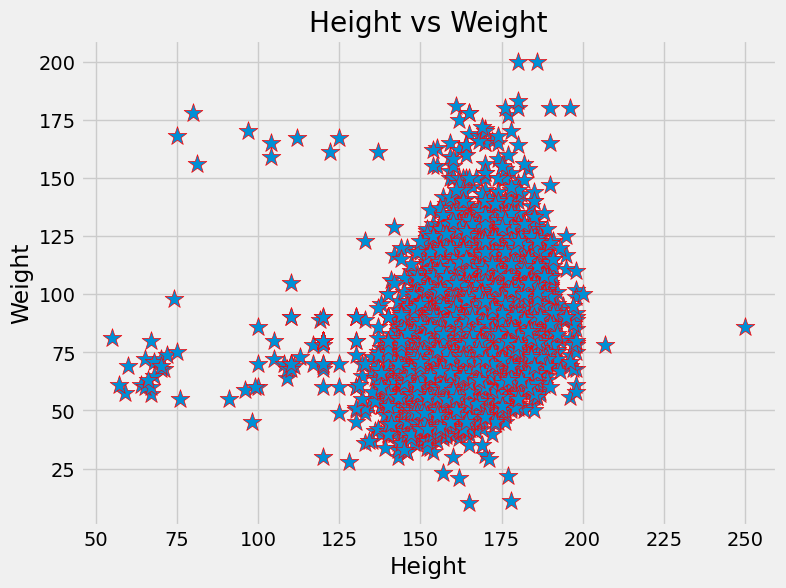

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(height,weight,marker = '*',s = 200,edgecolor = 'red')
plt.title('Height vs Weight')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

## creating a pie chart

In [13]:
g = glu.value_counts()

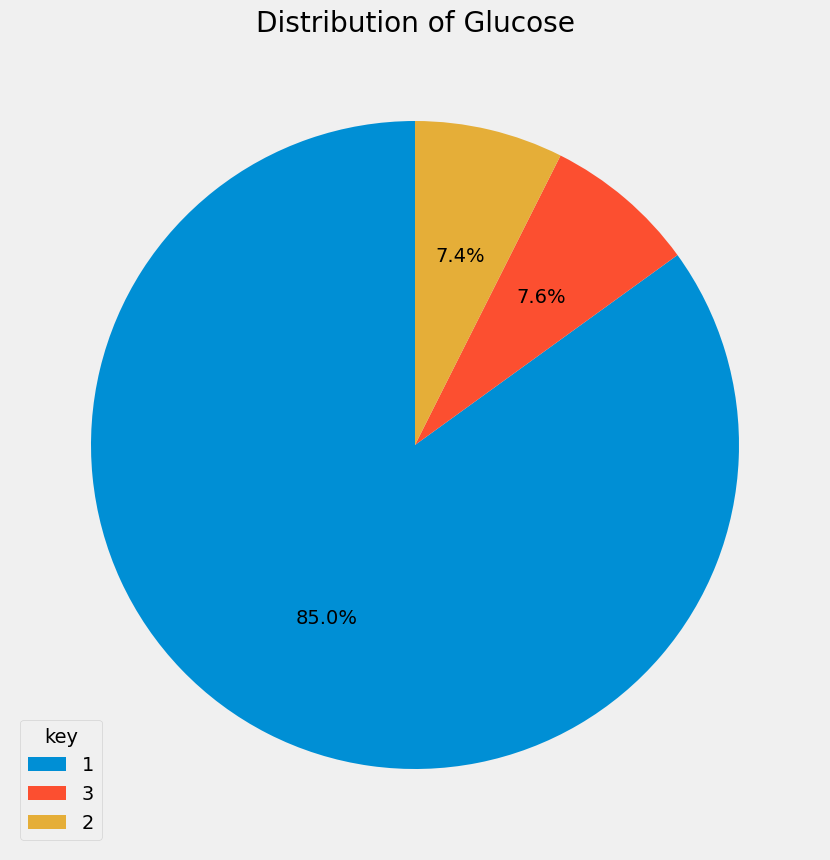

In [14]:
plt.figure(figsize=(12,10))
plt.pie(g,autopct = '%1.1f%%',startangle= 90)
plt.legend(g.index,loc = 'lower left',title = 'key')
plt.title('Distribution of Glucose')
plt.show()

In [15]:
heart_df.head()

,height,weight,cholesterol,gluc,cardio
0,168,62.0,1,1,0
1,156,85.0,3,1,1
2,165,64.0,3,1,1
3,169,82.0,1,1,1
4,156,56.0,1,1,0


In [16]:
glu.value_counts()

gluc
1    59479
3     5331
2     5190
Name: count, dtype: int64

In [17]:
c = cardio.value_counts()

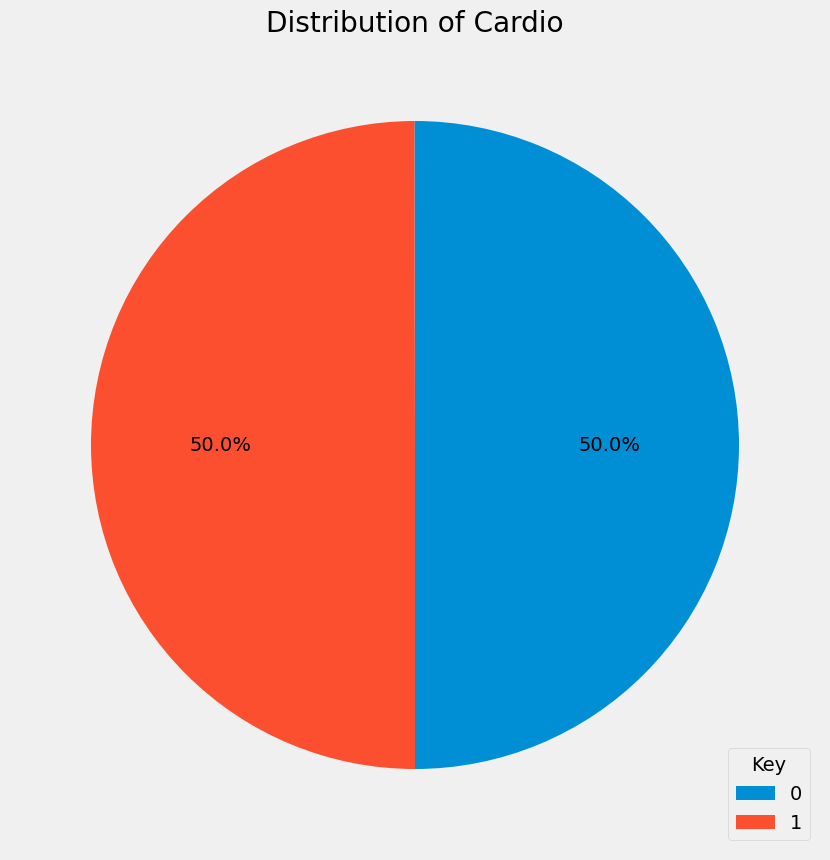

In [18]:
plt.figure(figsize = (12,10))
plt.pie(c,startangle = 270,autopct = '%1.1f%%')
plt.title('Distribution of Cardio')
plt.legend(c.index,title='Key',loc = 'lower right')
plt.show()

## Histogram

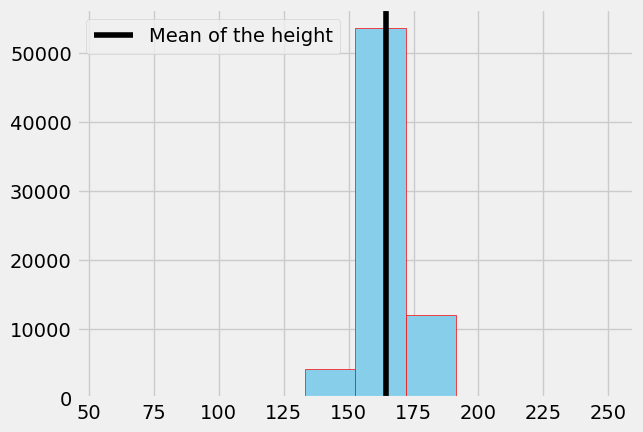

In [19]:
plt.hist(height,color = 'skyblue',edgecolor = 'red')
plt.axvline(height.mean(),color = 'black',label = 'Mean of the height')
plt.legend()
plt.show()

# Creating plots using the Seabron Library


In [20]:
import seaborn as sns

### bar plot

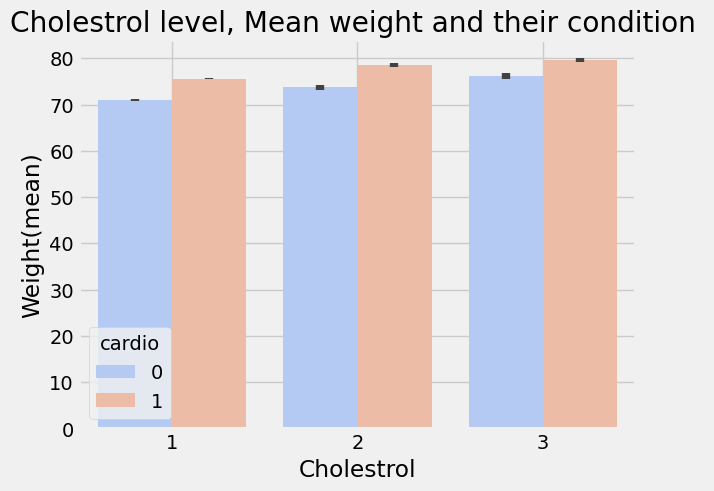

In [21]:
sns.barplot(x = 'cholesterol',y ='weight',data = heart_df,palette = 'coolwarm',hue ='cardio',ci = 95)
plt.title('Cholestrol level, Mean weight and their condition ')
plt.xlabel('Cholestrol')
plt.ylabel('Weight(mean)')
plt.grid(True)
plt.show()

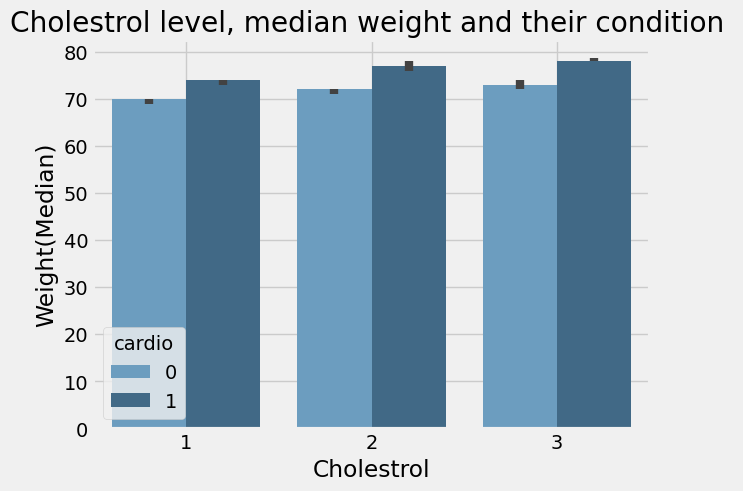

In [22]:
from numpy import median
sns.barplot(x = 'cholesterol',y ='weight',data = heart_df,palette = 'Blues_d',hue ='cardio',estimator = median)
plt.title('Cholestrol level, median weight and their condition ')
plt.xlabel('Cholestrol')
plt.ylabel('Weight(Median)')
plt.grid(True)
plt.show()

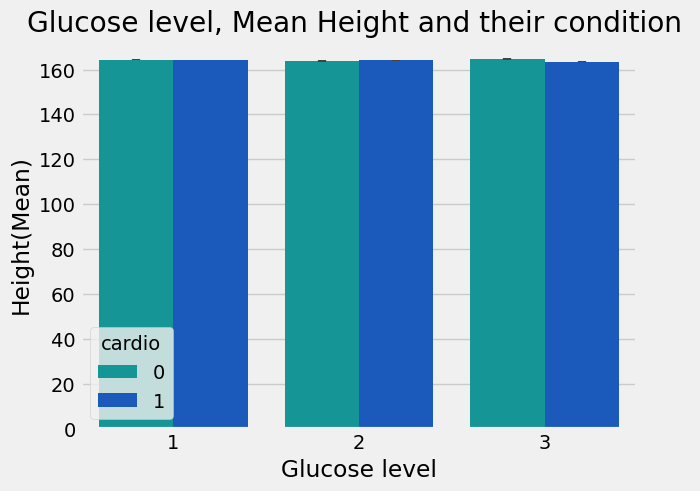

In [23]:
sns.barplot(x = 'gluc',y ='height',data = heart_df,palette = 'winter_r',hue ='cardio')
plt.title('Glucose level, Mean Height and their condition ')
plt.xlabel('Glucose level')
plt.ylabel('Height(Mean)')
plt.show()

### Count Plot

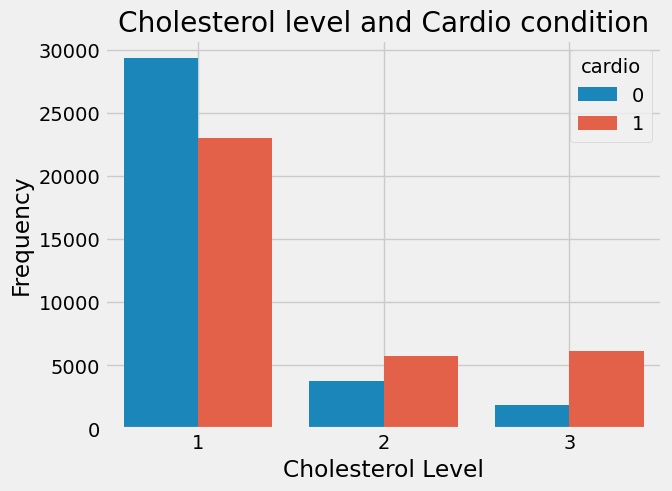

In [24]:
sns.countplot(x= 'cholesterol', data = heart_df,hue = 'cardio')
plt.title('Cholesterol level and Cardio condition')
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.grid(True)
plt.savefig(r"C:\Users\MALCOM_TREVOR\Desktop\DATA SCIENCE\MY PROJECT\data visualization\_countplot_showing cholesterol level and cardio condition.png")
plt.show()

### Box plot

<Axes: xlabel='height'>

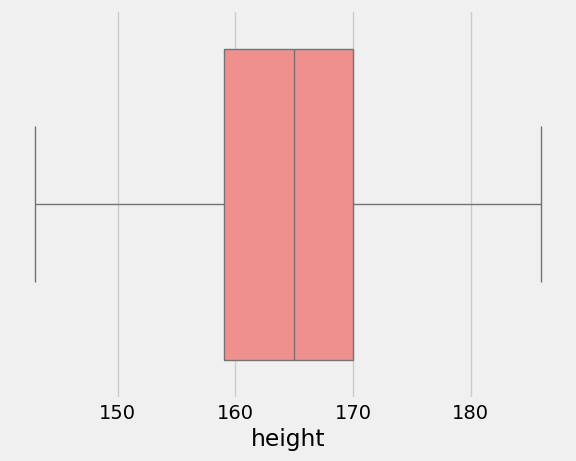

In [42]:
sns.boxplot(x = 'height',data = heart_df,palette = 'spring')

<Axes: xlabel='gluc', ylabel='height'>

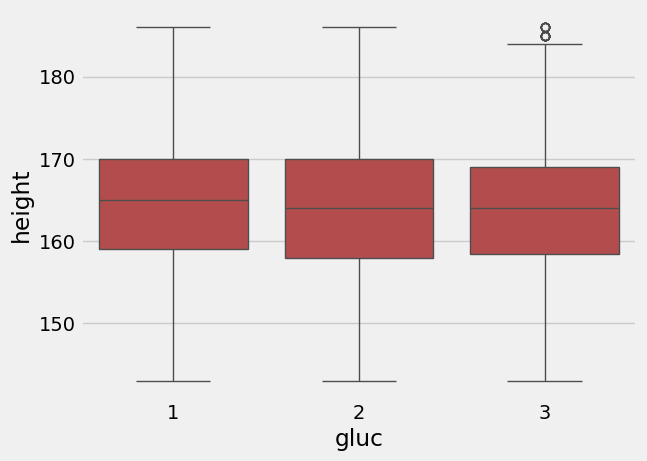

In [41]:
sns.boxplot(x ='gluc',y = 'height',data = heart_df,color = 'red',saturation = 0.4)

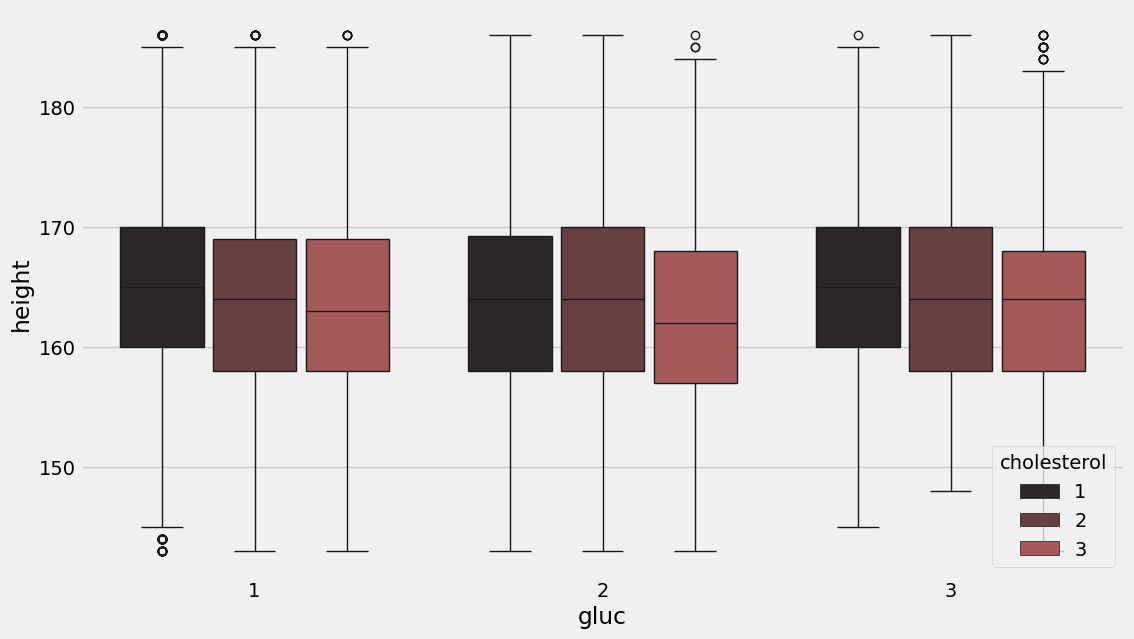

In [40]:
plt.figure(figsize=(12,7))
sns.boxplot(x ='gluc',y = 'height',data = heart_df,color = 'red',saturation = 0.3,hue = 'cholesterol',gap= 0.1)
plt.show()

## Handling outliers

In [28]:
Q1 = heart_df.height.quantile(0.25)
Q3 = heart_df.height.quantile(0.75)
IQR = Q3 - Q1
heart_df = heart_df[~((heart_df.height < (Q1 - 1.5 * IQR)) |(heart_df.height > (Q3 + 1.5 * IQR)))]

## Reg plot

In [29]:
df = heart_df.sample(frac = 0.3,random_state =1)

In [30]:
df

,height,weight,cholesterol,gluc,cardio
15638,172,70.0,1,2,1
39217,170,95.0,3,3,0
65280,152,65.0,1,1,1
2659,162,67.0,1,1,0
41418,173,76.0,1,1,0
...,...,...,...,...,...
35907,176,66.0,1,1,0
31319,170,90.0,3,3,0
16522,165,68.0,1,1,0
15113,160,75.0,2,1,1


<Axes: xlabel='height', ylabel='weight'>

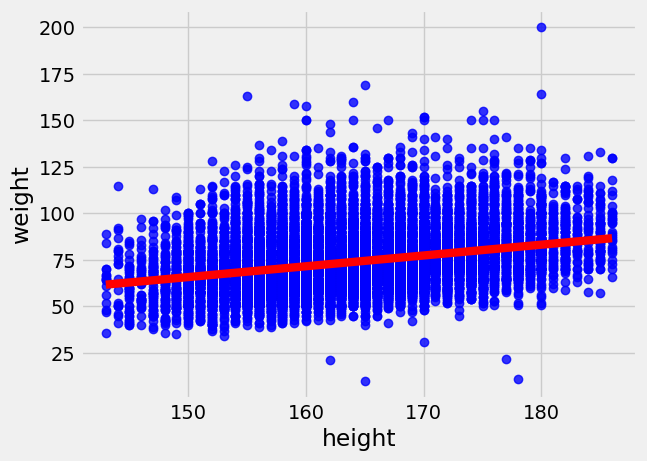

In [31]:
sns.regplot(x = 'height',y ='weight',data = df,scatter_kws = {'marker':'*','color':'blue'},line_kws = {'color':'red'})

<Axes: xlabel='height', ylabel='weight'>

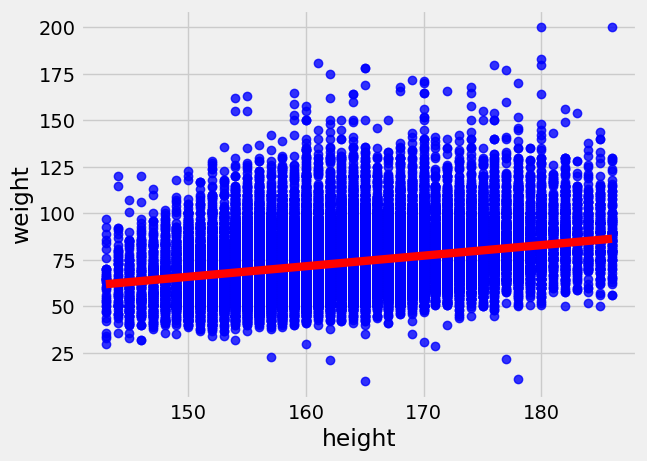

In [32]:
sns.regplot(x = 'height',y ='weight',data = heart_df
            ,scatter_kws = {'marker':'*','color':'blue'}
            ,line_kws = {'color':'red'})

# pair plot

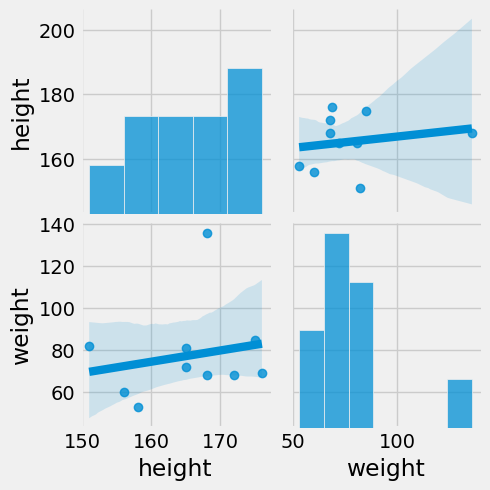

In [33]:
sns.pairplot(df.sample(n = 10),vars = ['height','weight'],kind = 'reg')

# KDE - Kennel Density Estim - PDF

<Axes: xlabel='weight', ylabel='Density'>

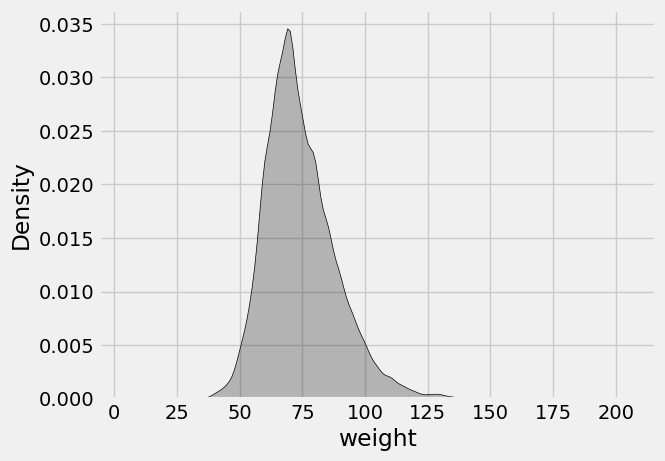

In [34]:
sns.kdeplot(x = 'weight',data = df,shade = True,color = 'black')

<Axes: xlabel='weight', ylabel='Density'>

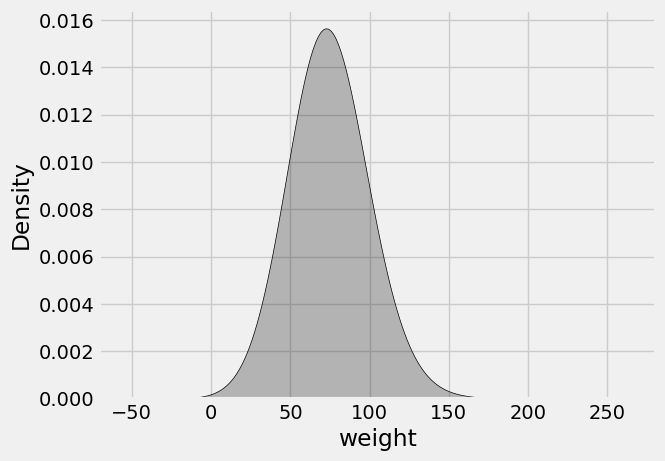

In [35]:
sns.kdeplot(x = 'weight',data = df,shade = True,color = 'black',bw = 1.5)

<Axes: xlabel='height', ylabel='Density'>

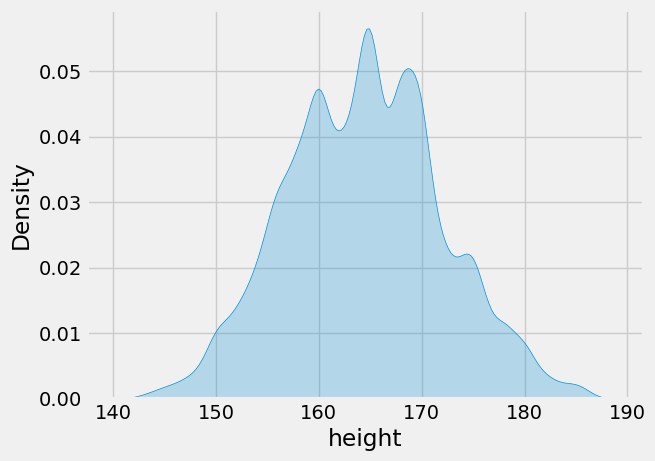

In [36]:
sns.kdeplot(x = 'height',data = df,shade = True)

<Axes: xlabel='weight', ylabel='Density'>

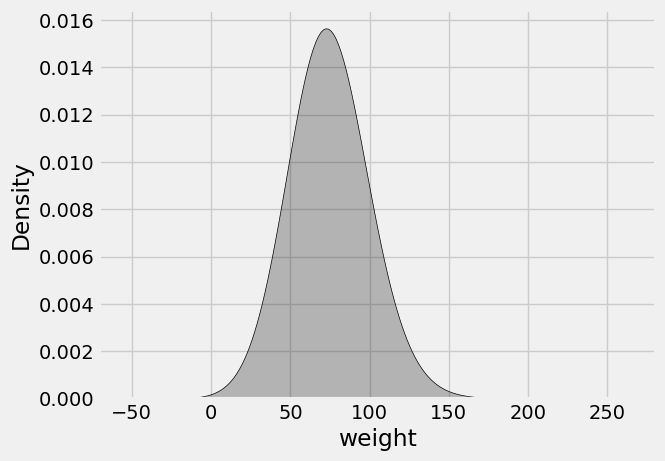

In [37]:
sns.kdeplot(x = 'weight',data = df,shade = True,color = 'black',bw = 1.5)

<Axes: xlabel='weight', ylabel='height'>

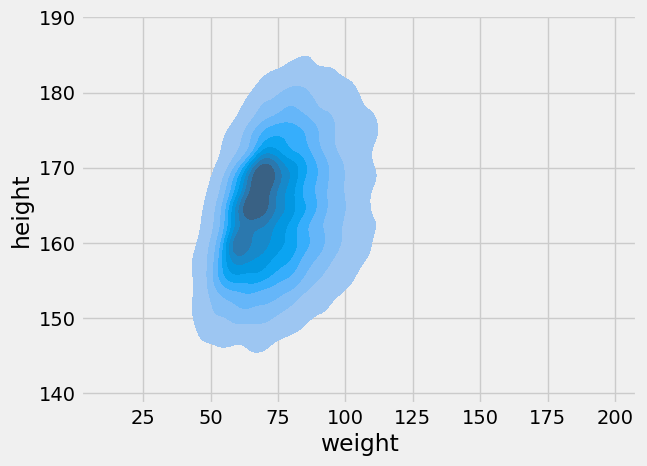

In [38]:
sns.kdeplot(x = 'weight',y ='height',data = df,shade = True)

In [39]:
heart_df.head()

,height,weight,cholesterol,gluc,cardio
0,168,62.0,1,1,0
1,156,85.0,3,1,1
2,165,64.0,3,1,1
3,169,82.0,1,1,1
4,156,56.0,1,1,0
